# K-Means/Gaussian-Mixture Clustering + SVM/SVC Prototype

Here starting with some __unlabled__ initial data points we do clustering in a *__feature space__*, afterwards we use __SVM/SVC__ in order to find the __separating hyperplanes__ (i.e. boundaries) for each cluster in the  *__physical (geographical) space__*.

**Author:** 
*Soheil Esmaeilzadeh - 8/10/2018*

In [166]:
from sklearn import svm, datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(1). At this step we create data points with a certain *standard deviation value* spread out around some *centroids*.

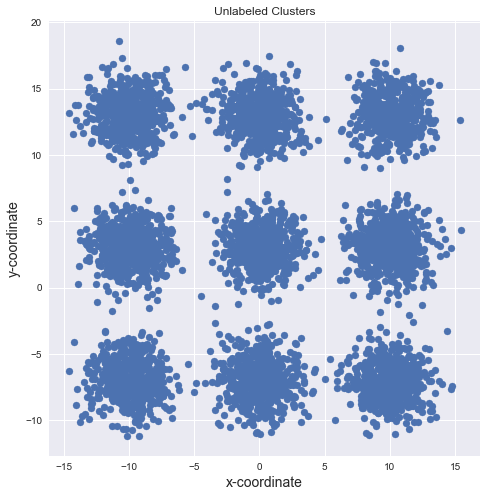

In [167]:
centeroid = [(-10,-7), (-10,3), (-10,13), (0,-7), (0,3), (0,13), (10,-7), (10,3), (10,13)]
x, _ = datasets.make_blobs(n_samples = 5000, centers = centeroid, cluster_std = 1.5, random_state = 1)
cmap = 'tab10'
plt.figure(figsize=(17,8))
plt.subplot(121, title = 'Unlabeled Clusters')
plt.scatter(x[:,0], x[:,1])
plt.xlabel('x-coordinate', fontsize=14)
plt.ylabel('y-coordinate', fontsize=14)
plt.show()

(2). At this step, using **Kmeans clustering** we cluster the generated data points in step (1) specifying the number of clusters apriori to be *n_clusters=9*.

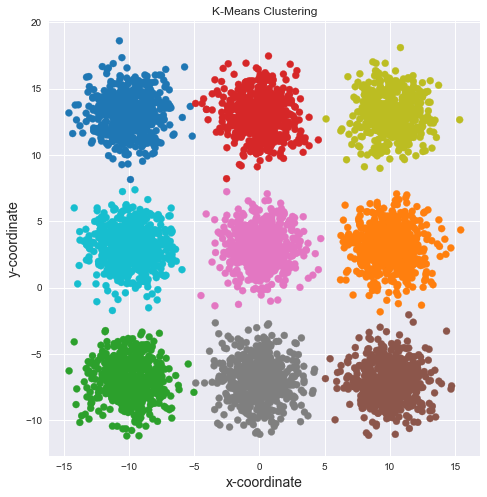

In [168]:
km = KMeans(n_clusters = 9, random_state = 1).fit_predict(x)
plt.figure(figsize=(17,8))
plt.subplot(121, title = 'K-Means Clustering')
plt.scatter(x[:,0], x[:,1], c=km, cmap=cmap)
plt.xlabel('x-coordinate', fontsize=14)
plt.ylabel('y-coordinate', fontsize=14)
plt.show()

(3). At this step, we would like to find the separating hyperplanes (boundaries) of the clusters found in step (2). In order to do that we use **Support Vector Classification (SVC)** in order to classfiy the points in the physical space and find out which points belong to which category.

In [169]:
X = x # we should make sure that X contains only two features i.e. x,y coordinates.
y = km

# create the mesh to plot in
x_min, x_max = 1 + X[:, 0].min() - 1, X[:, 0].max() 
y_min, y_max = 1 + X[:, 1].min() - 1, X[:, 1].max() 
d = abs(x_max / x_min)/10
xx, yy = np.meshgrid(np.arange(x_min, x_max, d), np.arange(y_min, y_max, d))

# SVC using Radial basis function (rbf) kernel, alternatives: "linear", "poly"
svc = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.5).fit(X, y) 
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

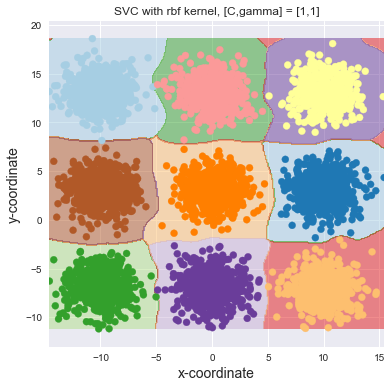

In [170]:
f_lx = 6
f_ly = 6
plt.figure(figsize=(f_lx,f_ly))
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.5)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('x-coordinate', fontsize=14)
plt.ylabel('y-coordinate', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel, [C,gamma] = [1,1]')
plt.show()

In the following we would like to bring up an other alternative to Kmeans clustering, Gaussian Mixture clustering, which is robust in case there exists noise in the data.

Again we create data points with a certain *standard deviation value* spread out around some *centroids*.

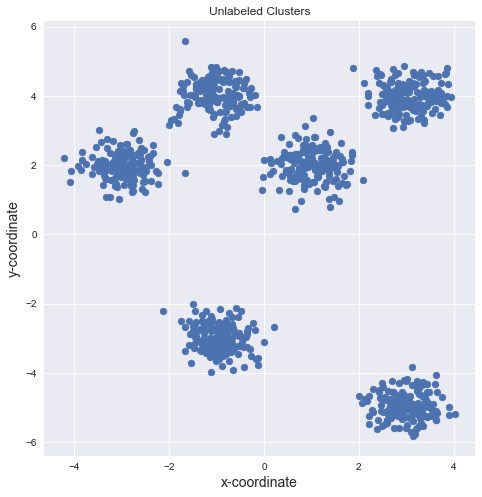

In [171]:
centroids = [(-1,-3),(-1,4),(-3,2),(3,-5),(1,2),(3,4)]
x, _ = datasets.make_blobs(n_samples = 1000, centers = centroids, cluster_std = 0.4, random_state = 1)
cmap = 'tab10'
plt.figure(figsize=(17,8))
plt.subplot(121, title = 'Unlabeled Clusters')
plt.xlabel('x-coordinate', fontsize=14)
plt.ylabel('y-coordinate', fontsize=14)
plt.scatter(x[:,0], x[:,1])
plt.show()

Specifying the number of clusters apriori to be *n_clusters = 6*, we do clustering using both *Kmeans* and *Gaussian mixture*.

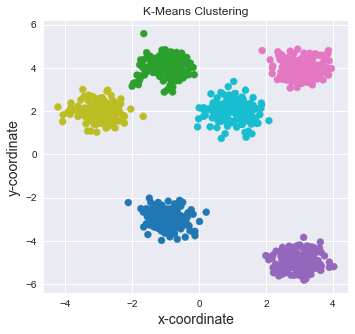

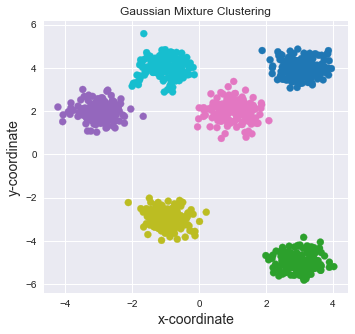

In [172]:
n_clusters = 6

#Predict clusters by K-Means 
km = KMeans(n_clusters, random_state=9).fit_predict(x)
plt.figure(figsize=(12,5))
plt.subplot(121, title='K-Means Clustering')
plt.scatter(x[:,0], x[:,1], c = km, cmap = cmap)
plt.xlabel('x-coordinate', fontsize = 14)
plt.ylabel('y-coordinate', fontsize = 14)
plt.show()

#Predict clusters by Gaussian Mixture
gm = GaussianMixture(n_clusters).fit(x).predict(x)
plt.figure(figsize=(12,5))
plt.subplot(122, title='Gaussian Mixture Clustering')
plt.scatter(x[:,0], x[:,1], c = gm, cmap = cmap)
plt.xlabel('x-coordinate', fontsize = 14)
plt.ylabel('y-coordinate', fontsize = 14)
plt.show()

As can be seen in the clustering results, here, there is not much a difference between the two, since the data has no noise, but in case of noise in the data Gaussian Mixture will perform better.

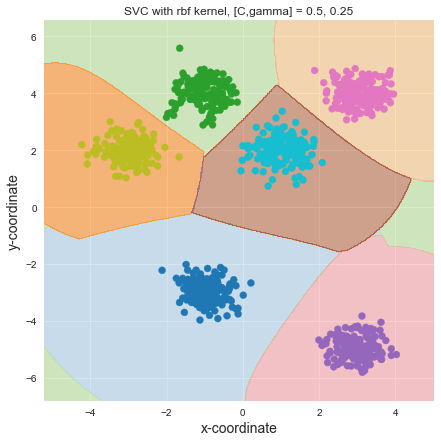

In [173]:
X = x 
y = km
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = abs(x_max / x_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

c = 0.5
g = 0.25
# SVC using Radial basis function (rbf) kernel, alternatives: "linear", "poly"
svc = svm.SVC(kernel = 'rbf', C = c, gamma = g).fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7,7))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('x-coordinate', fontsize = 14)
plt.ylabel('y-coordinate', fontsize = 14)
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel, [C,gamma] = {}, {}'.format(c, g))
plt.show()